# Initial Review of Available Data
https://coronavirustechhandbook.com/
Has some interesting looking ideas, as well as quite a lot of datasets

https://github.com/CSSEGISandData/COVID-19
Has data on cases by day, split out by country and region

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import date, timedelta


In [2]:
full_data = pd.DataFrame()
full_data_length = 0 
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
first_file = date(2020,1,22)

for i in [first_file + timedelta(days=x) for x in range((date.today()-first_file).days)]:
    date = (i.strftime("%m-%d-%Y"))
    df = pd.read_csv(base_url + date + ".csv",parse_dates=[0])
    df['file_date'] = i
    full_data_length =+ len(df.index)
    print("There were {} lines of data on {}".format(len(df.index), date) )
    full_data = full_data.append(df)


There were 38 lines of data on 01-22-2020
There were 46 lines of data on 01-23-2020
There were 41 lines of data on 01-24-2020
There were 44 lines of data on 01-25-2020
There were 47 lines of data on 01-26-2020
There were 51 lines of data on 01-27-2020
There were 52 lines of data on 01-28-2020
There were 54 lines of data on 01-29-2020
There were 58 lines of data on 01-30-2020
There were 62 lines of data on 01-31-2020
There were 67 lines of data on 02-01-2020
There were 67 lines of data on 02-02-2020
There were 68 lines of data on 02-03-2020
There were 70 lines of data on 02-04-2020
There were 71 lines of data on 02-05-2020
There were 71 lines of data on 02-06-2020
There were 72 lines of data on 02-07-2020
There were 72 lines of data on 02-08-2020
There were 72 lines of data on 02-09-2020
There were 72 lines of data on 02-10-2020
There were 73 lines of data on 02-11-2020
There were 73 lines of data on 02-12-2020
There were 74 lines of data on 02-13-2020
There were 75 lines of data on 02-

In [3]:
full_data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,file_date,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-22,NaN,NaN
...,...,...,...,...,...,...,...,...,...
287,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0,2020-03-19,49.1900,-2.110
288,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0,2020-03-19,18.2000,-66.500
289,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0,2020-03-19,-1.4400,15.556
290,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0,2020-03-19,24.2500,-76.000


In [4]:
#Wont worry about province for now
#Last Update can be replaced with the file_date now
    #maybe not the best thing to do, but dont want to fiddle with the different date formats for now
# Lat Long not useful for now, expecially asfter removing the province info. Can add back normalised location data later
selected_fields = full_data.drop(['Province/State','Last Update','Latitude','Longitude'], axis = 1)
aggregate_data = selected_fields.groupby(['Country/Region','file_date']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'}).reset_index()
aggregate_data

,Country/Region,file_date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0
...,...,...,...,...,...
3377,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0
3378,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0
3379,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0
3380,occupied Palestinian territory,2020-03-16,0.0,0.0,0.0


In [5]:
aggregate_data['active_infections'] = aggregate_data['Confirmed'] - aggregate_data['Recovered'] - aggregate_data['Deaths']
aggregate_data['death_rate'] = aggregate_data['Deaths'] / aggregate_data['Confirmed']
aggregate_data['date'] = pd.to_datetime(aggregate_data['file_date'], format="%Y-%m-%d")

In [6]:
#Look at single country first
china_data = aggregate_data[aggregate_data["Country/Region"] == 'Mainland China']
#Index on date for time series plotting
china_data = china_data.set_index('date')
china_data

,Country/Region,file_date,Confirmed,Deaths,Recovered,active_infections,death_rate
date,,,,,,,
2020-01-22,Mainland China,2020-01-22,547.0,17.0,28.0,502.0,0.031079
2020-01-23,Mainland China,2020-01-23,639.0,18.0,30.0,591.0,0.028169
2020-01-24,Mainland China,2020-01-24,916.0,26.0,36.0,854.0,0.028384
2020-01-25,Mainland China,2020-01-25,1399.0,42.0,39.0,1318.0,0.030021
2020-01-26,Mainland China,2020-01-26,2062.0,56.0,49.0,1957.0,0.027158
2020-01-27,Mainland China,2020-01-27,2863.0,82.0,58.0,2723.0,0.028641
2020-01-28,Mainland China,2020-01-28,5494.0,131.0,101.0,5262.0,0.023844
2020-01-29,Mainland China,2020-01-29,6070.0,133.0,120.0,5817.0,0.021911
2020-01-30,Mainland China,2020-01-30,8124.0,171.0,135.0,7818.0,0.021049


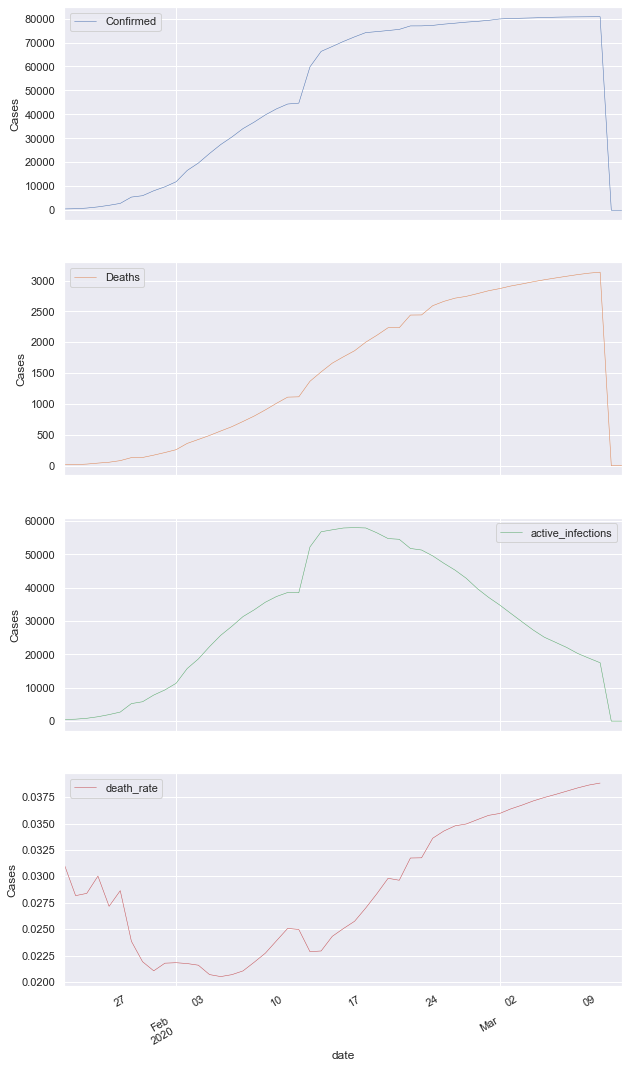

In [7]:

cols_for_plotting = ['Confirmed', 'Deaths', 'active_infections','death_rate']
sns.set(rc={'figure.figsize':(10, 5*len(cols_for_plotting))})
axes = china_data[cols_for_plotting].plot(linewidth=0.5, subplots=True)
for ax in axes:
    ax.set_ylabel('Cases') #TODO:death_rate should be labelled differently


Simple Timeseries Metrics for Austria


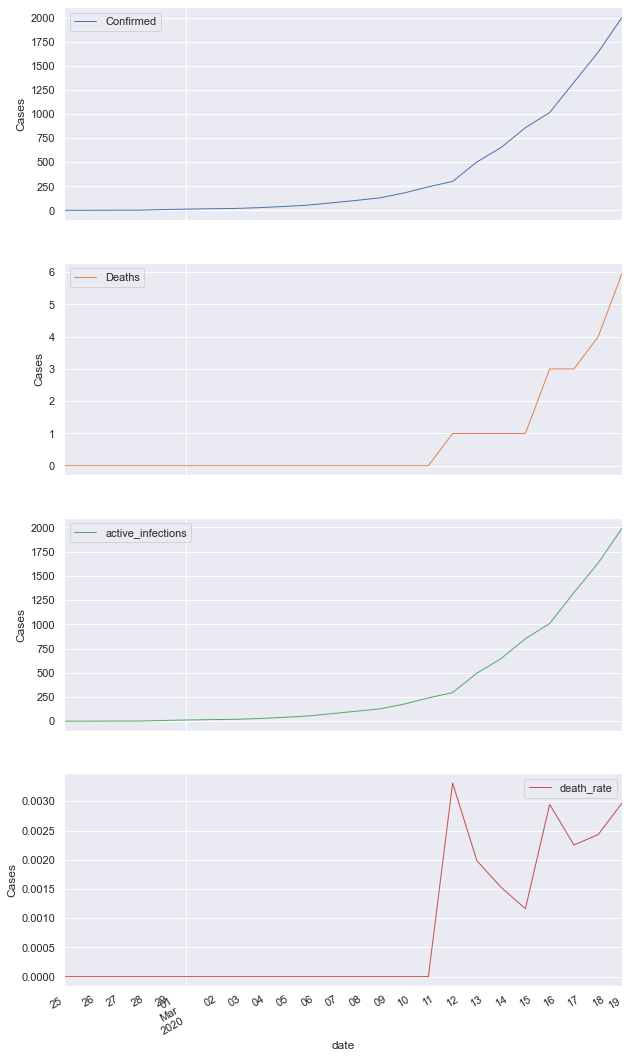

Simple Timeseries Metrics for Belgium


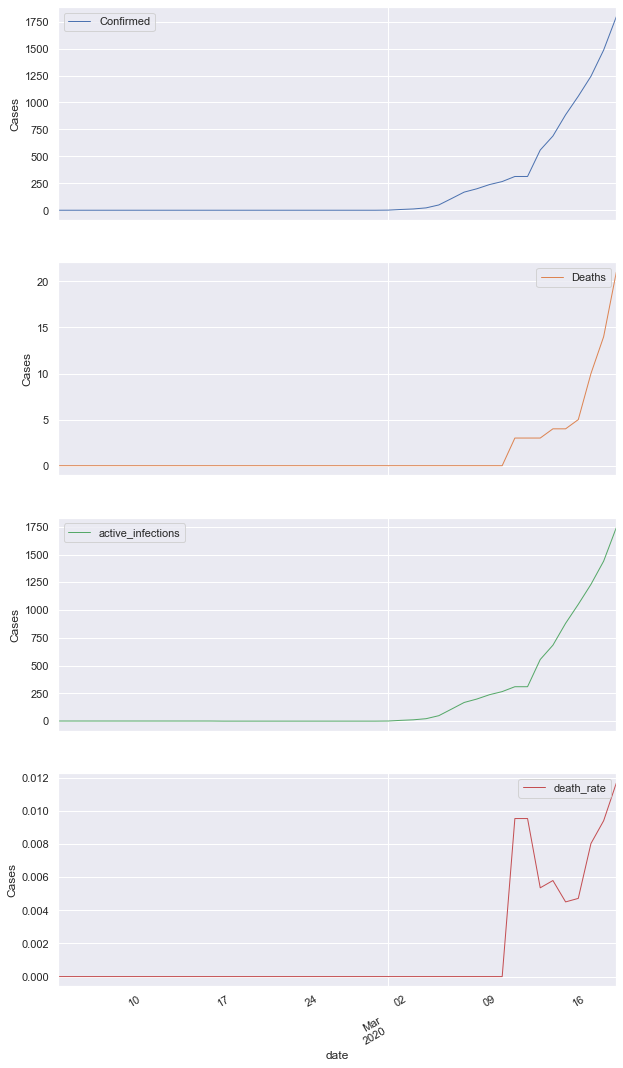

Simple Timeseries Metrics for China


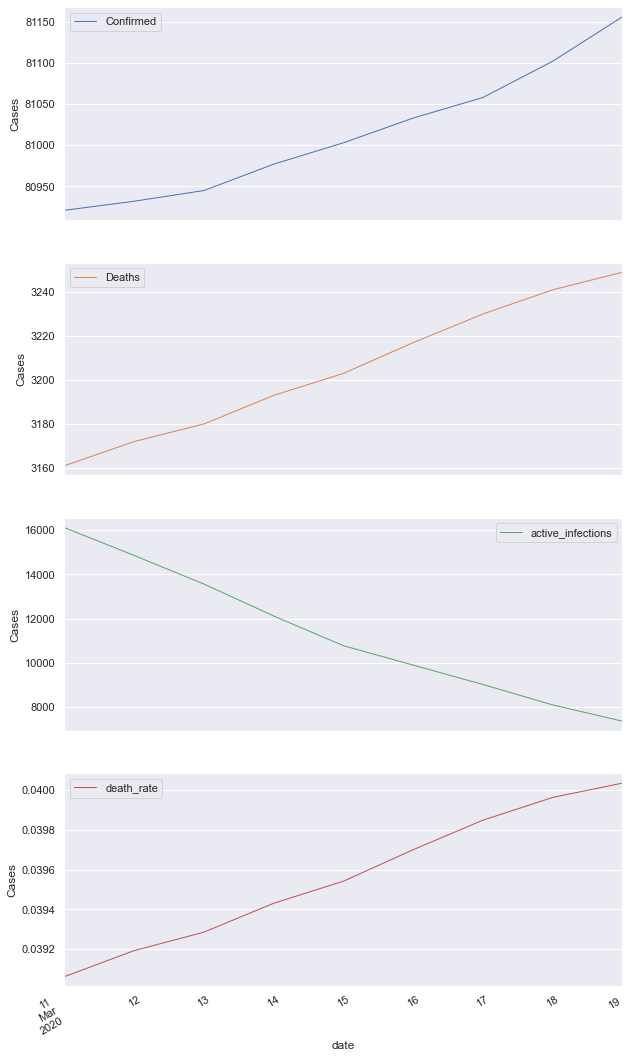

Simple Timeseries Metrics for Denmark


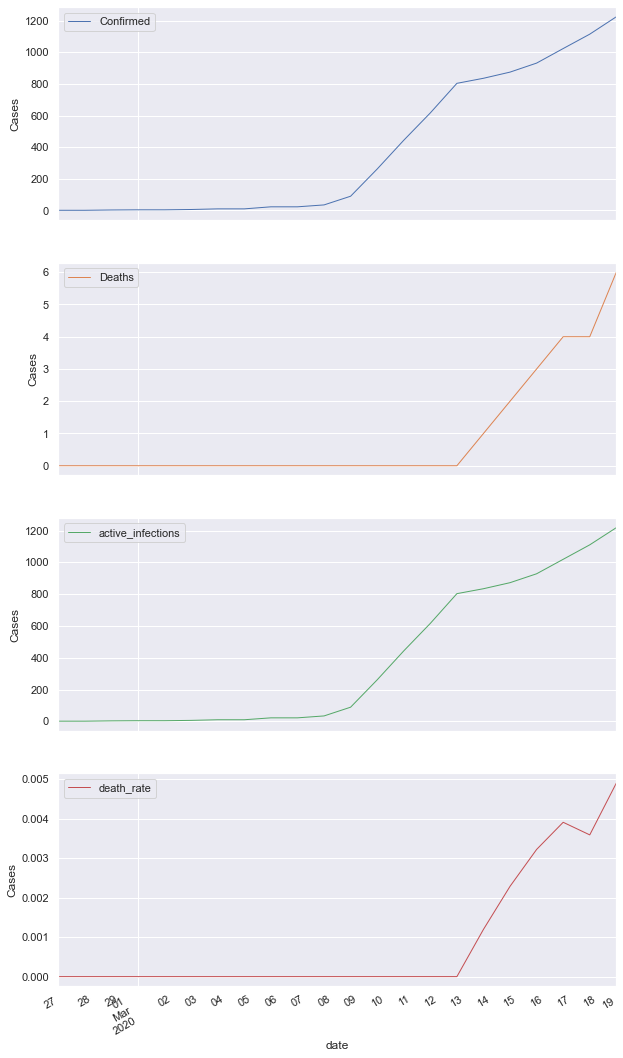

Simple Timeseries Metrics for France


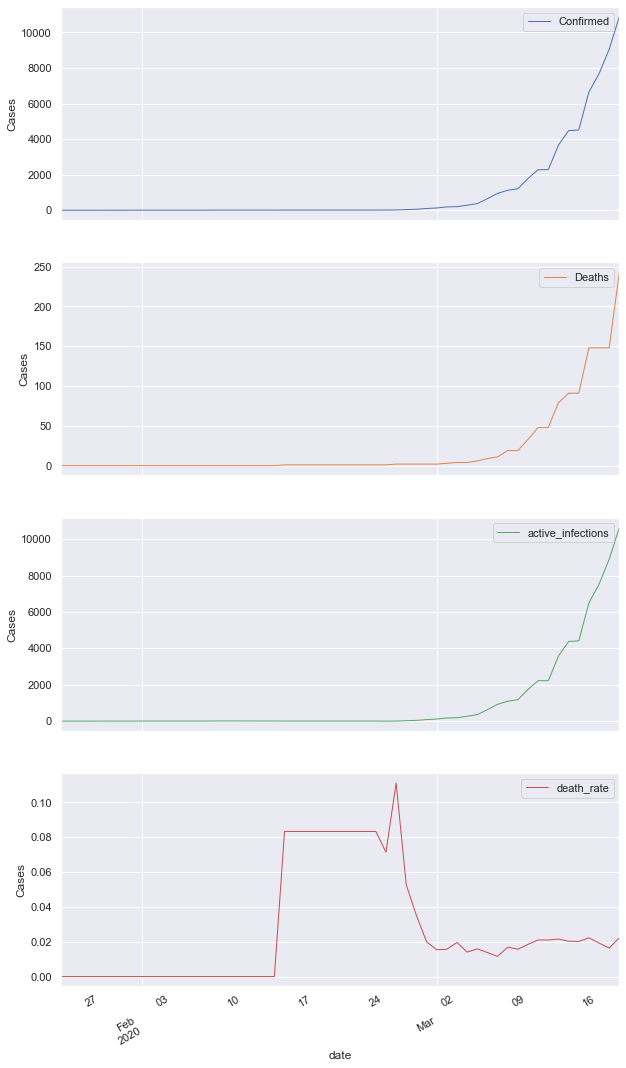

Simple Timeseries Metrics for Germany


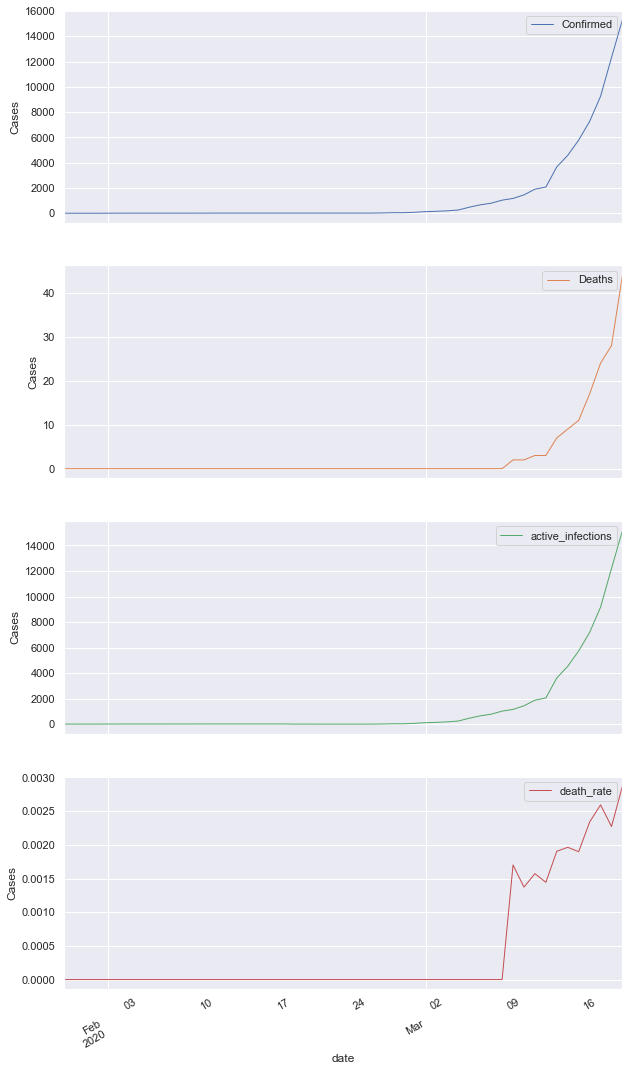

Simple Timeseries Metrics for Iran


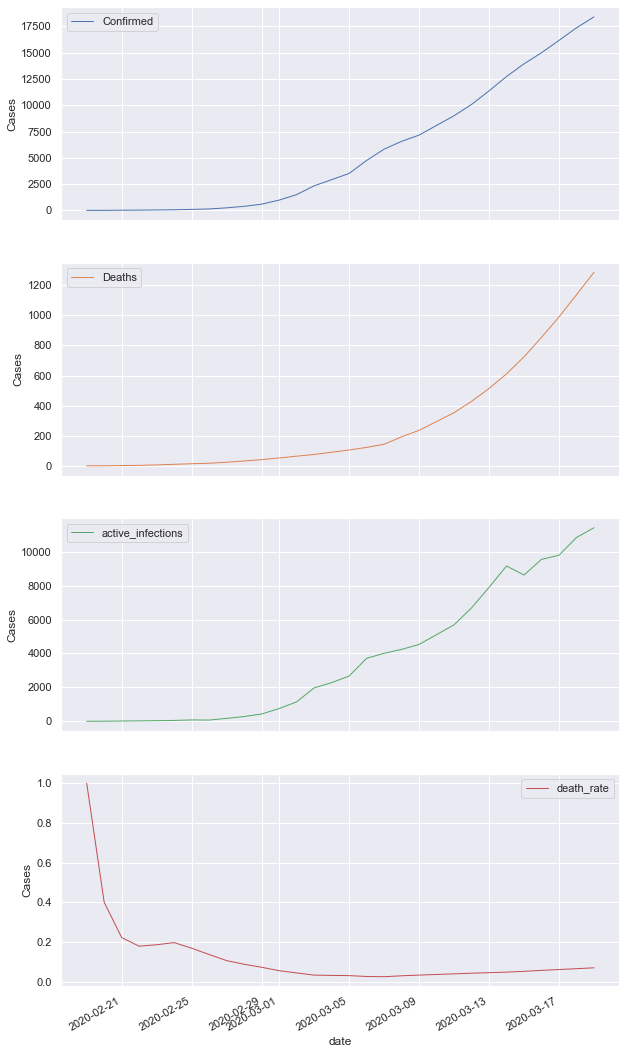

Simple Timeseries Metrics for Iran (Islamic Republic of)


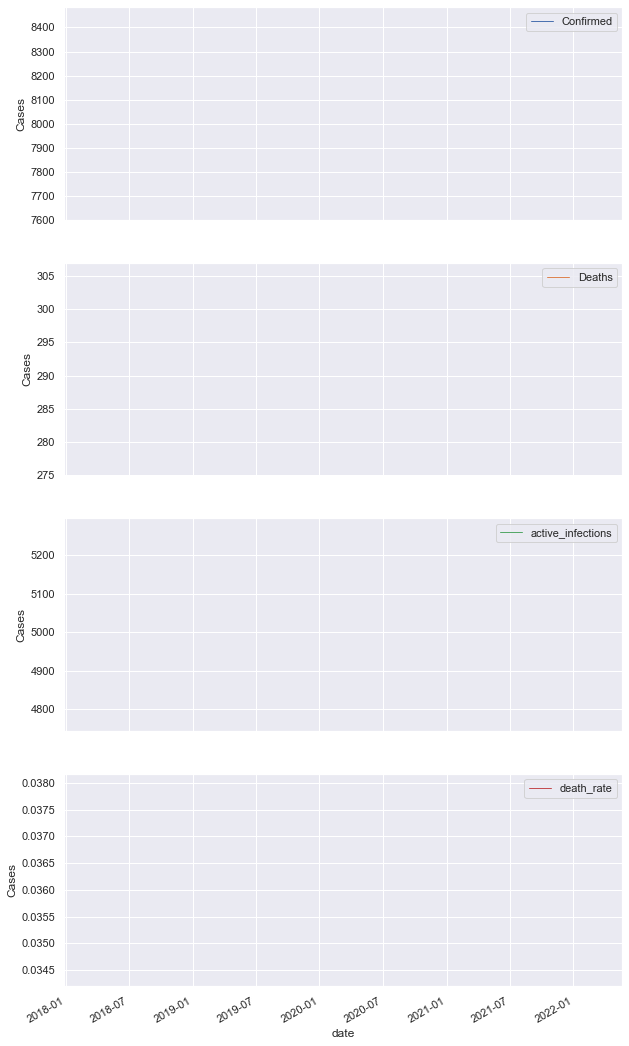

Simple Timeseries Metrics for Italy


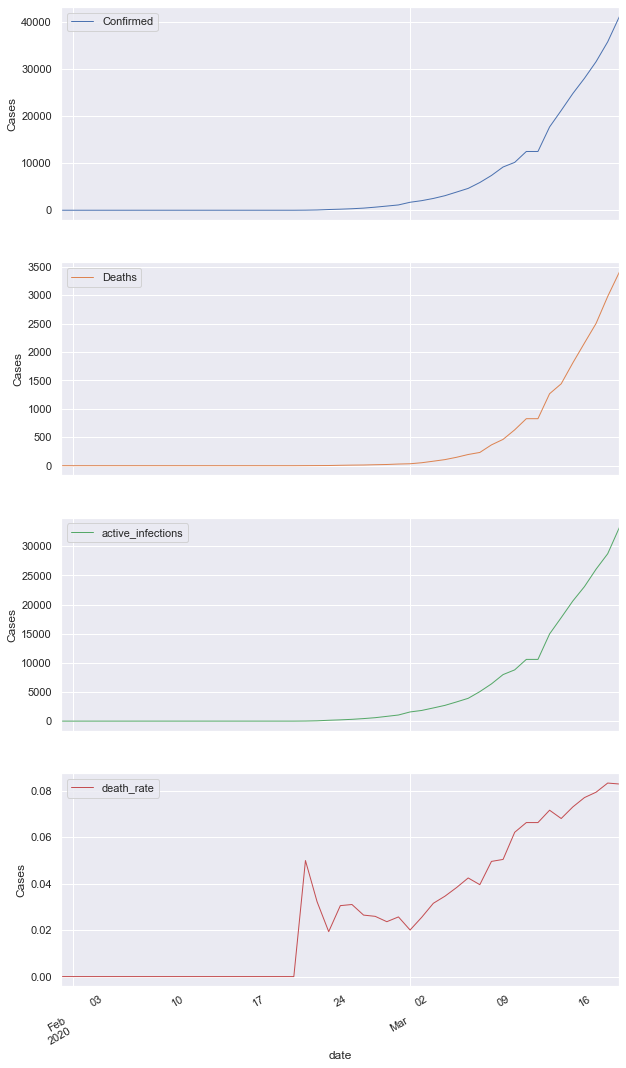

Simple Timeseries Metrics for Korea, South


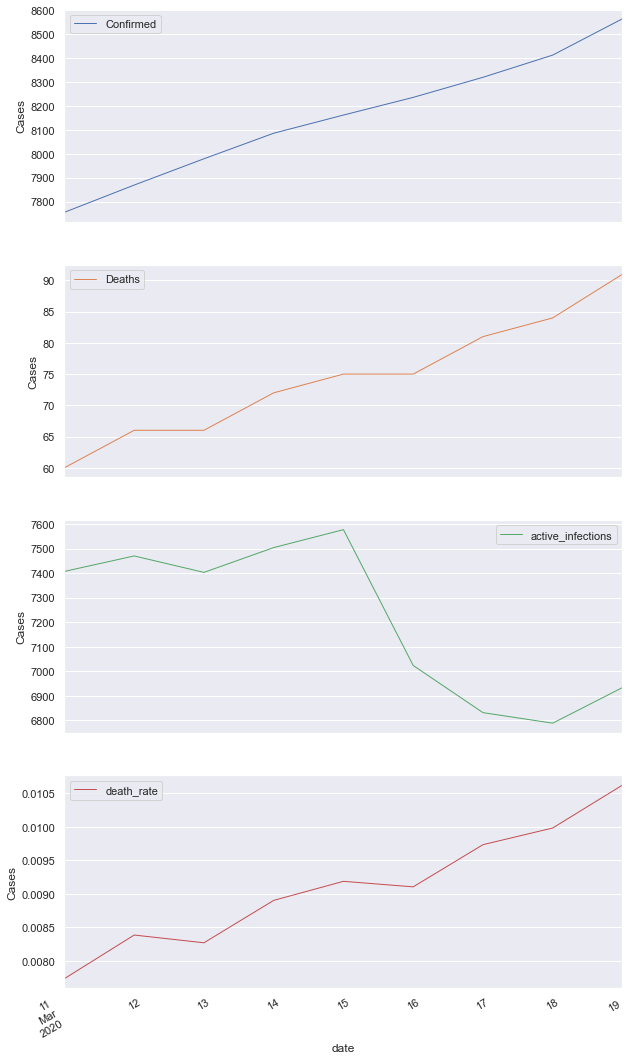

Simple Timeseries Metrics for Mainland China


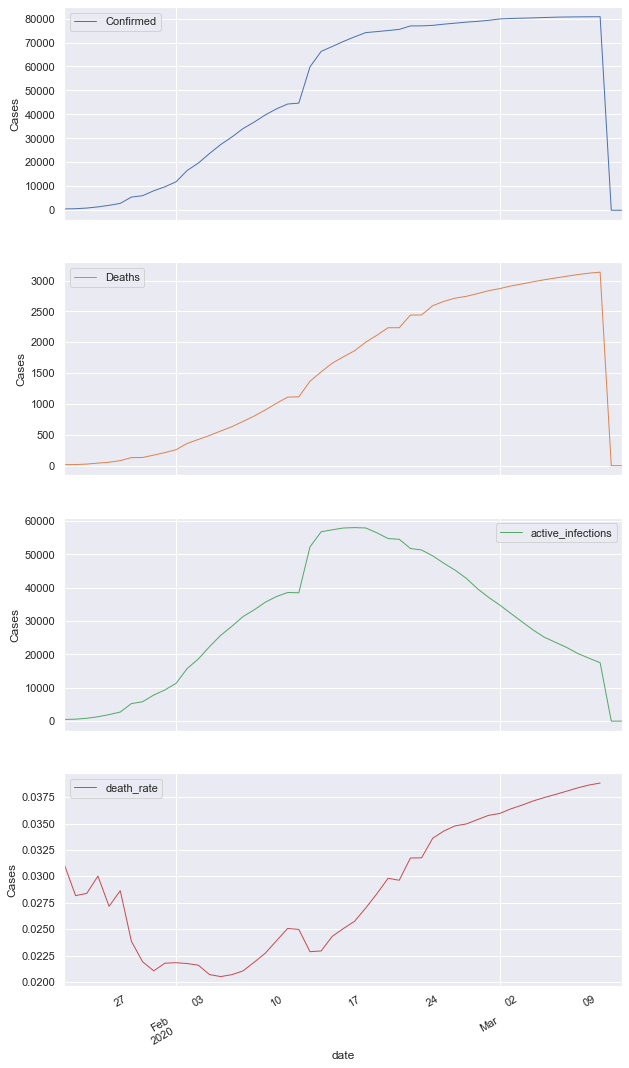

Simple Timeseries Metrics for Netherlands


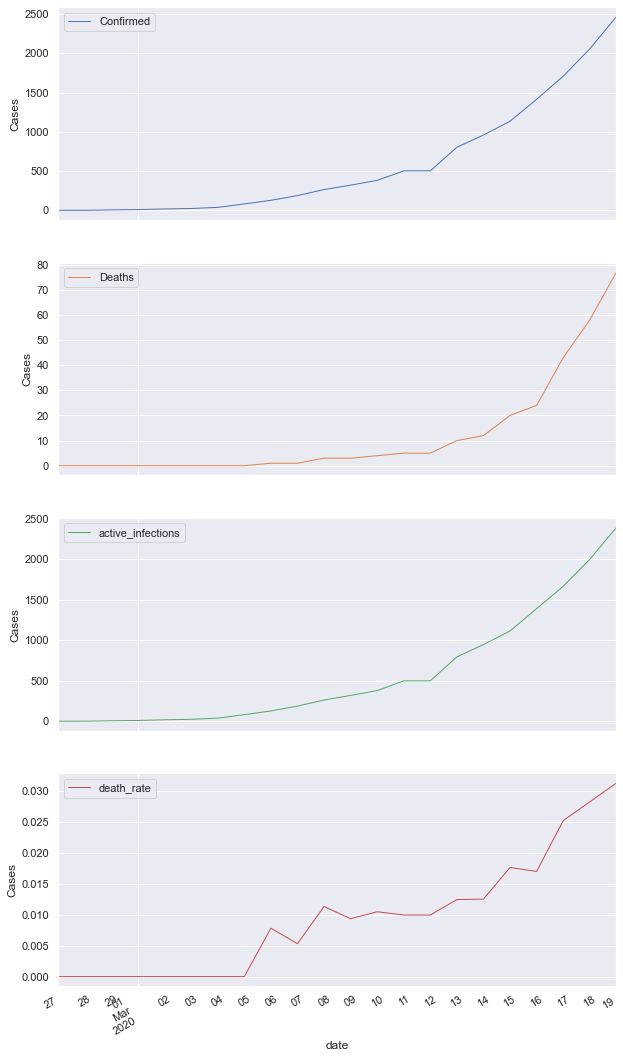

Simple Timeseries Metrics for Norway


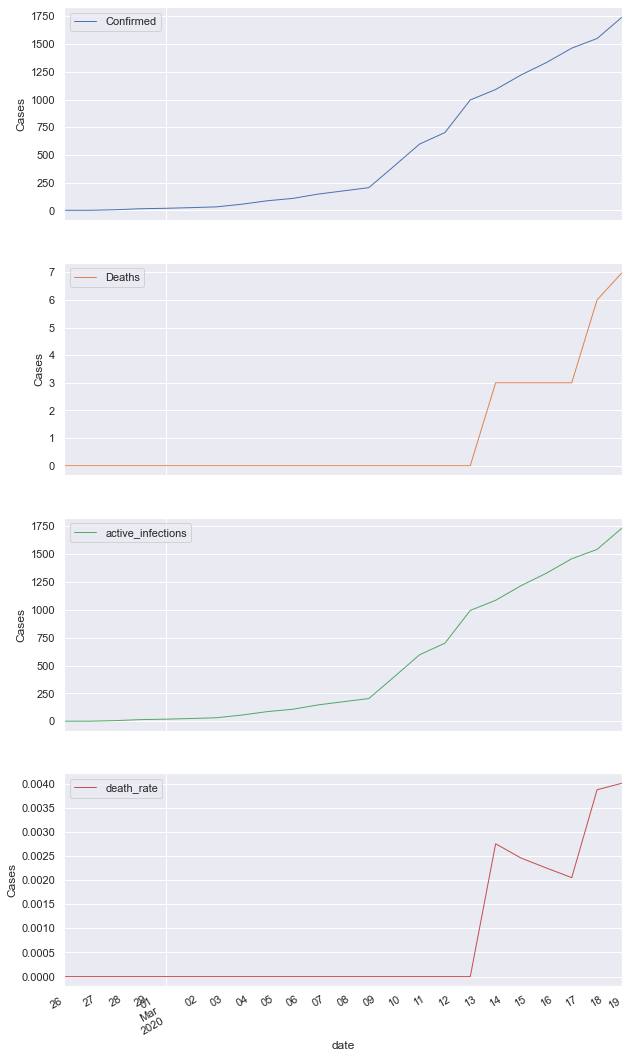

Simple Timeseries Metrics for Republic of Korea


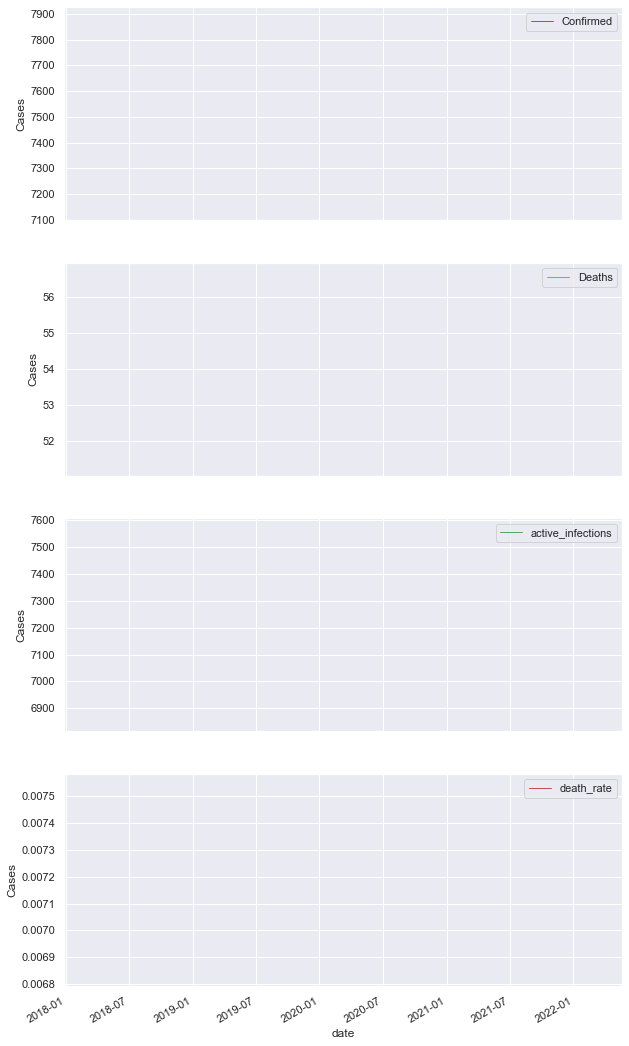

Simple Timeseries Metrics for South Korea


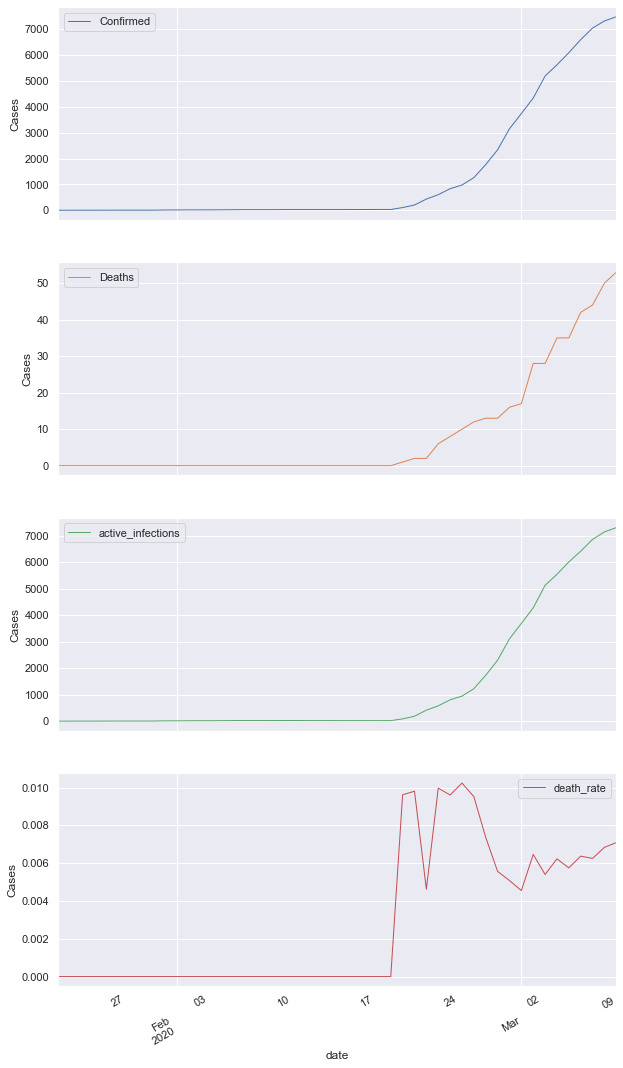

Simple Timeseries Metrics for Spain


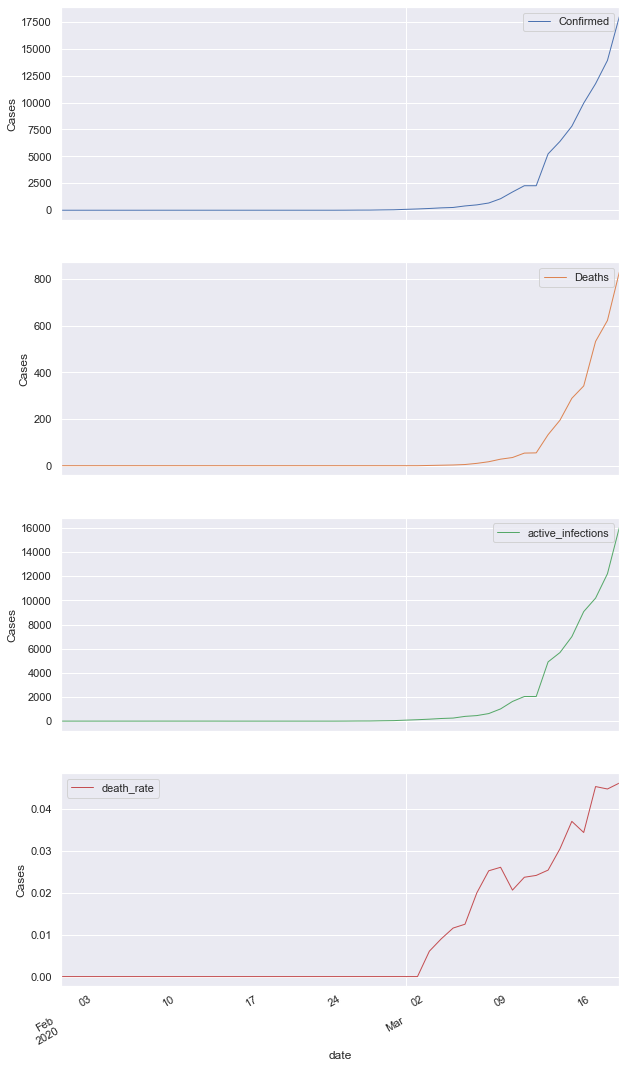

Simple Timeseries Metrics for Sweden


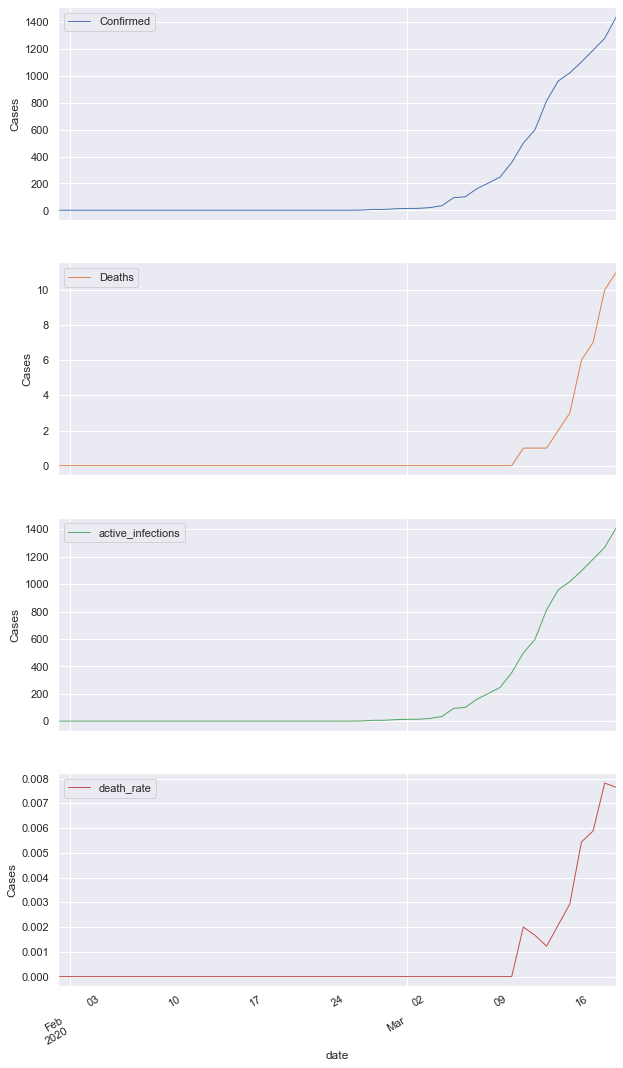

Simple Timeseries Metrics for Switzerland


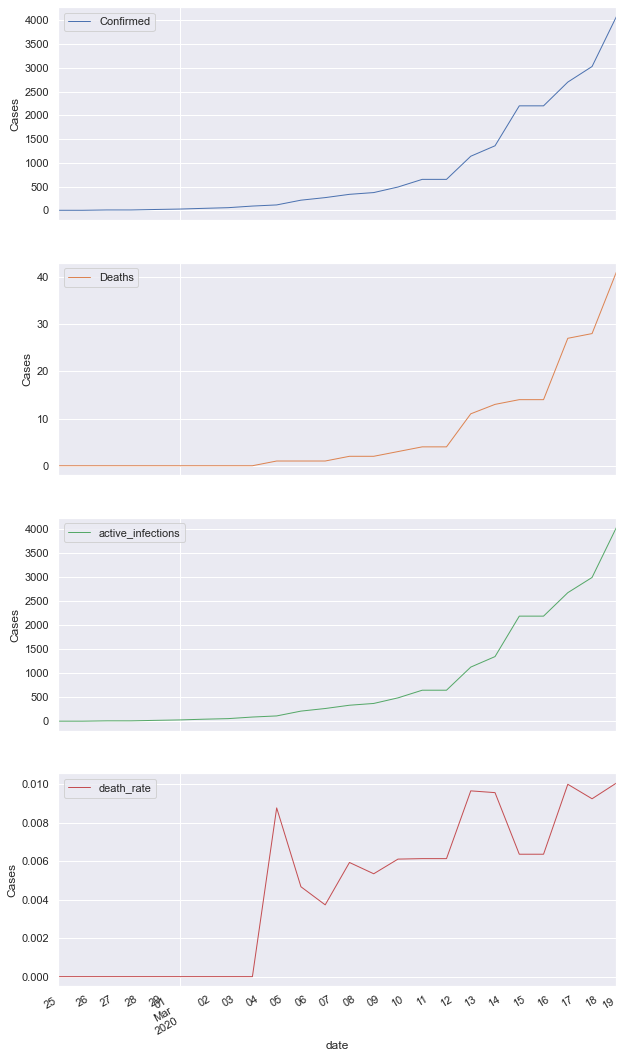

Simple Timeseries Metrics for US


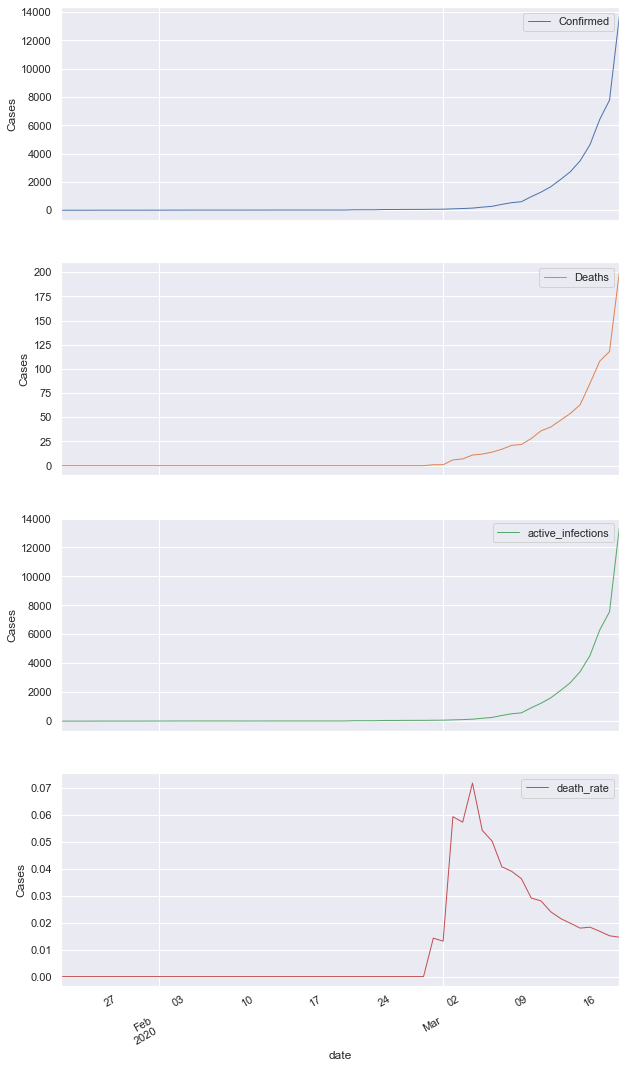

Simple Timeseries Metrics for United Kingdom


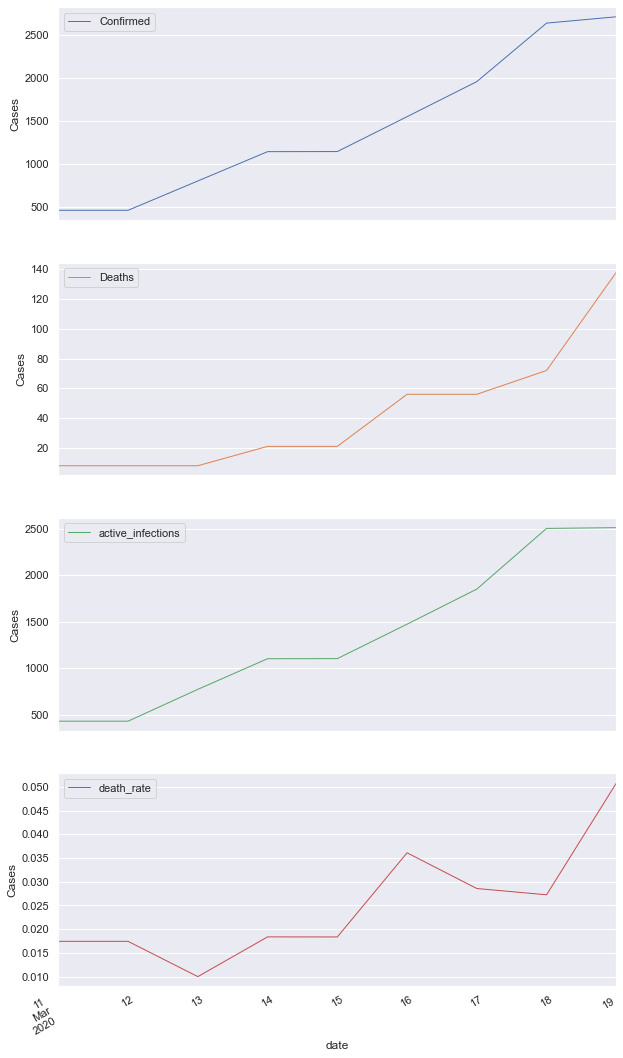

In [8]:
#Reasonably arbitrary threshold, limit analysis to countries that have had at least 1000 reported cases
threshold = 1000
max_cases_by_country = aggregate_data.groupby(['Country/Region']).agg({'Confirmed':'max'}).reset_index()
countries_above_threshold = max_cases_by_country[max_cases_by_country["Confirmed"] > threshold]
countries = countries_above_threshold['Country/Region'].unique()

#countries = ['United Kingdom']

for country in countries:
    print("Simple Timeseries Metrics for {}".format(country))
    data_for_plotting = aggregate_data[aggregate_data["Country/Region"] == country].set_index('date')
    cols_for_plotting = ['Confirmed', 'Deaths', 'active_infections','death_rate']
    sns.set(rc={'figure.figsize':(10, 5*len(cols_for_plotting))})
    axes = data_for_plotting[cols_for_plotting].plot(linewidth=1, subplots=True)
    for ax in axes:
        ax.set_ylabel('Cases')
    plt.show()
